In [6]:
## AE optimizer Experiment Notebook
# 1. Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/projects/ae-vae-anomaly-detection/data/processed/cleaned.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# 2. Load Processed Data
import pandas as pd

#load cleaned data
cleaned_df = pd.read_csv(data_path)
print(f'Loaded cleaned data: {cleaned_df.shape[0]} rows, {cleaned_df.shape[1]} columns')

# get a small sample for training model
df = cleaned_df.sample(frac=0.1, random_state=42)
print(f'Sampled data: {df.shape[0]} rows, {df.shape[1]} columns')

Loaded cleaned data: 640788 rows, 178 columns
Sampled data: 64079 rows, 178 columns


In [8]:
# 3. Train/Test Split
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop(columns='label')
y = df['label']

# First split off a mixed test set (normal+anomaly), stratified to keep the same
#    anomaly ratio in train and test.
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# From the remaining (X_temp / y_temp) we only train on the normal samples:
#    i.e. drop the anomalies from this “train+val pool”
X_train_val = X_temp[y_temp == 0]

# Finally split that normal‐only pool into X_train / X_val
X_train, X_val = train_test_split(
    X_train_val,
    test_size=0.2,
    random_state=42
)

# Now:
#  - X_train, X_val are both *only* normal samples (for AE/VAE training & early stopping)
#  - X_test / y_test is your held‐out mixed set (with both normal and anomalous),
#    and it never overlaps with X_train or X_val

In [9]:
!mkdir -p /content/src/models

In [10]:
import sys
sys.path.append('/content/src')
from models.ae_model import build_ae, train_autoencoder_with_optimizer, plot_training_history
from models.ae_evaluation import evaluate_anomaly_detection, visualize_reconstruction, compute_reconstruction_error

In [11]:
from src.models.ae_model import build_ae
from importlib import reload
import src.models.ae_model as ae_model
reload(ae_model)

<module 'src.models.ae_model' from '/content/src/models/ae_model.py'>

In [16]:
from tensorflow.keras.optimizers import Adam, SGD
from keras.optimizers import AdamW
results = {}
optimizers = {
    "Adam": Adam(learning_rate=1e-3),
    "AdamW": AdamW(learning_rate=1e-3),
    "SGD": SGD(learning_rate=1e-2, momentum=0.9)
}


🔧 Training AE with Adam
Epoch 1/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1385 - mae: 0.2510

627/627 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.1381 - mae: 0.2504 - val_loss: 0.0028 - val_mae: 0.0149 - learning_rate: 0.0010
Epoch 2/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mae: 0.0267

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0041 - mae: 0.0266 - val_loss: 0.0022 - val_mae: 0.0103 - learning_rate: 0.0010
Epoch 3/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mae: 0.0133

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0029 - mae: 0.0133 - val_loss: 0.0019 - val_mae: 0.0092 - learning_rate: 0.0010
Epoch 4/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0122

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0025 - mae: 0.0122 - val_loss: 0.0015 - val_mae: 0.0086 - learning_rate: 0.0010
Epoch 5/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mae: 0.0117

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0022 - mae: 0.0117 - val_loss: 0.0014 - val_mae: 0.0081 - learning_rate: 0.0010
Epoch 6/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mae: 0.0114

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0021 - mae: 0.0114 - val_loss: 0.0011 - val_mae: 0.0077 - learning_rate: 0.0010
Epoch 7/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mae: 0.0110

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0018 - mae: 0.0110 - val_loss: 9.1885e-04 - val_mae: 0.0068 - learning_rate: 0.0010
Epoch 8/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - mae: 0.0106

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0017 - mae: 0.0106 - val_loss: 7.9579e-04 - val_mae: 0.0066 - learning_rate: 0.0010
Epoch 9/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0104

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0016 - mae: 0.0104 - val_loss: 7.3929e-04 - val_mae: 0.0061 - learning_rate: 0.0010
Epoch 10/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0015 - mae: 0.0102 - val_loss: 6.7856e-04 - val_mae: 0.0060 - learning_rate: 0.0010
Epoch 11/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - mae: 0.0100

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014 - mae: 0.0100 - val_loss: 6.5142e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 12/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0098

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0013 - mae: 0.0098 - val_loss: 6.0204e-04 - val_mae: 0.0057 - learning_rate: 0.0010
Epoch 13/100
614/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0097

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0013 - mae: 0.0097 - val_loss: 5.6719e-04 - val_mae: 0.0055 - learning_rate: 0.0010
Epoch 14/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0096

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0096 - val_loss: 5.2515e-04 - val_mae: 0.0052 - learning_rate: 0.0010
Epoch 15/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0094

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0012 - mae: 0.0094 - val_loss: 5.1054e-04 - val_mae: 0.0054 - learning_rate: 0.0010
Epoch 16/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0094


Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0012 - mae: 0.0094 - val_loss: 4.8339e-04 - val_mae: 0.0053 - learning_rate: 0.0010
Epoch 17/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0011 - mae: 0.0089 - val_loss: 4.4369e-04 - val_mae: 0.0044 - learning_rate: 5.0000e-04
Epoch 18/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.5419e-04 - val_mae: 0.0047 - learning_rate: 5.0000e-04
Epoch 19/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.3923e-04 - val_mae: 0.0046 - learning_rate: 5.0000e-04
Epoch 20/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0088


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0011 - mae: 0.0088 - val_loss: 4.3037e-04 - val_mae: 0.0045 - learning_rate: 5.0000e-04
Epoch 21/100
615/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0011 - mae: 0.0086 - val_loss: 4.1406e-04 - val_mae: 0.0043 - learning_rate: 2.5000e-04
Epoch 22/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0010 - mae: 0.0086 - val_loss: 4.0657e-04 - val_mae: 0.0042 - learning_rate: 2.5000e-04
Epoch 23/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0086
Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0010 - mae: 0.0086 - val_loss: 4.0838e-04 - val_mae: 0.0043 - learning_rate: 2.5000e-04
Epoch 24/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0010 - mae: 0.0086 - val_loss: 3.9761e-04 - val_mae: 0.0041 - learning_rate: 1.2500e-04
Epoch 25/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.9251e-04 - val_mae: 0.0042 - learning_rate: 1.2500e-04
Epoch 26/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085


Epoch 26: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8756e-04 - val_mae: 0.0041 - learning_rate: 1.2500e-04
Epoch 27/100
615/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8659e-04 - val_mae: 0.0040 - learning_rate: 6.2500e-05
Epoch 28/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8556e-04 - val_mae: 0.0040 - learning_rate: 6.2500e-05
Epoch 29/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085
Epoch 29: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8572e-04 - val_mae: 0.0040 - learning_rate: 6.2500e-05
Epoch 30/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - mae: 0.0084

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.8096e-04 - val_mae: 0.0039 - learning_rate: 3.1250e-05
Epoch 31/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.8120e-04 - val_mae: 0.0039 - learning_rate: 3.1250e-05
Epoch 32/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - mae: 0.0084


Epoch 32: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7952e-04 - val_mae: 0.0039 - learning_rate: 3.1250e-05
Epoch 33/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0084

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7872e-04 - val_mae: 0.0039 - learning_rate: 1.5625e-05
Epoch 34/100
615/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7798e-04 - val_mae: 0.0039 - learning_rate: 1.5625e-05
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0085


Epoch 35: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.7579e-04 - val_mae: 0.0039 - learning_rate: 1.5625e-05
Epoch 36/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7594e-04 - val_mae: 0.0039 - learning_rate: 7.8125e-06
Epoch 37/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.7647e-04 - val_mae: 0.0039 - learning_rate: 7.8125e-06
Epoch 38/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mae: 0.0084
Epoch 38: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7587e-04 - val_mae: 0.0039 - learning_rate: 7.8125e-06
Epoch 39/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7606e-04 - val_mae: 0.0039 - learning_rate: 3.9063e-06
Epoch 40/100
624/627 ━━━━━━━

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.7357e-04 - val_mae: 0.0039 - learning_rate: 3.9063e-06
Epoch 41/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9485e-04 - mae: 0.0084
Epoch 41: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.9493e-04 - mae: 0.0084 - val_loss: 3.7436e-04 - val_mae: 0.0039 - learning_rate: 3.9063e-06
Epoch 42/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7626e-04 - val_mae: 0.0039 - learning_rate: 1.9531e-06
Epoch 43/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0010 - mae: 0.0084 - val_loss: 3.7684e-04 - val_mae: 0.0039 - learning_rate: 1.9531e-06
Epoch 44/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0085
Epoch 44: ReduceLROnPlateau reducing learning rate to 1e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0010 - mae: 0.0085 - val_loss: 3.7443e-04 - val_mae: 0

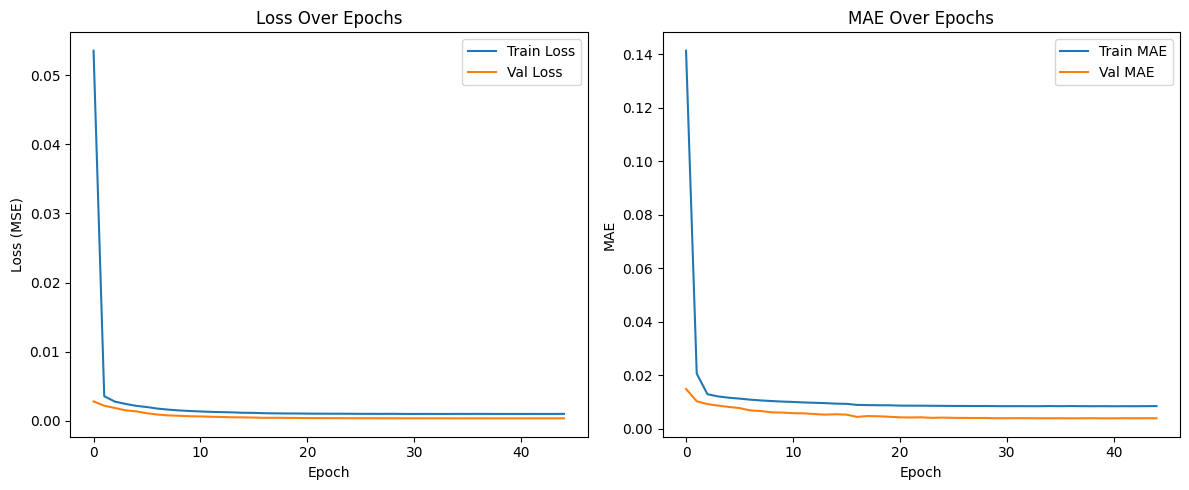

✅ Training plot saved as: ae_training_Adam.png
📊 Evaluation for Adam
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

🔧 Training AE with AdamW
Epoch 1/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1344 - mae: 0.2470

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1334 - mae: 0.2456 - val_loss: 0.0030 - val_mae: 0.0148 - learning_rate: 0.0010
Epoch 2/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mae: 0.0265

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0042 - mae: 0.0265 - val_loss: 0.0025 - val_mae: 0.0108 - learning_rate: 0.0010
Epoch 3/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mae: 0.0138

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0032 - mae: 0.0138 - val_loss: 0.0022 - val_mae: 0.0098 - learning_rate: 0.0010
Epoch 4/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mae: 0.0126

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0028 - mae: 0.0126 - val_loss: 0.0018 - val_mae: 0.0088 - learning_rate: 0.0010
Epoch 5/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mae: 0.0120

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0024 - mae: 0.0120 - val_loss: 0.0015 - val_mae: 0.0080 - learning_rate: 0.0010
Epoch 6/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0115

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0022 - mae: 0.0115 - val_loss: 0.0012 - val_mae: 0.0075 - learning_rate: 0.0010
Epoch 7/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mae: 0.0110

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0019 - mae: 0.0110 - val_loss: 9.9480e-04 - val_mae: 0.0073 - learning_rate: 0.0010
Epoch 8/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0107

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0018 - mae: 0.0107 - val_loss: 8.7937e-04 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 9/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0104

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0016 - mae: 0.0104 - val_loss: 8.2504e-04 - val_mae: 0.0063 - learning_rate: 0.0010
Epoch 10/100
614/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - mae: 0.0102

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0015 - mae: 0.0102 - val_loss: 7.7239e-04 - val_mae: 0.0062 - learning_rate: 0.0010
Epoch 11/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0099

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0014 - mae: 0.0099 - val_loss: 7.2774e-04 - val_mae: 0.0060 - learning_rate: 0.0010
Epoch 12/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0097

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0014 - mae: 0.0097 - val_loss: 7.1486e-04 - val_mae: 0.0058 - learning_rate: 0.0010
Epoch 13/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0096
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0013 - mae: 0.0096 - val_loss: 7.2948e-04 - val_mae: 0.0057 - learning_rate: 0.0010
Epoch 14/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0013 - mae: 0.0091 - val_loss: 6.6266e-04 - val_mae: 0.0052 - learning_rate: 5.0000e-04
Epoch 15/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0013 - mae: 0.0091 - val_loss: 6.5019e-04 - val_mae: 0.0053 - learning_rate: 5.0000e-04
Epoch 16/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0091

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0012 - mae: 0.0091 - val_loss: 6.4705e-04 - val_mae: 0.0052 - learning_rate: 5.0000e-04
Epoch 17/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0090


Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0090 - val_loss: 6.3785e-04 - val_mae: 0.0051 - learning_rate: 5.0000e-04
Epoch 18/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0089

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0012 - mae: 0.0089 - val_loss: 6.1837e-04 - val_mae: 0.0048 - learning_rate: 2.5000e-04
Epoch 19/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 6.0888e-04 - val_mae: 0.0048 - learning_rate: 2.5000e-04
Epoch 20/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0088


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 6.0713e-04 - val_mae: 0.0048 - learning_rate: 2.5000e-04
Epoch 21/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0088

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0012 - mae: 0.0088 - val_loss: 6.0196e-04 - val_mae: 0.0047 - learning_rate: 1.2500e-04
Epoch 22/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0087

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0012 - mae: 0.0087 - val_loss: 5.9911e-04 - val_mae: 0.0046 - learning_rate: 1.2500e-04
Epoch 23/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0087


Epoch 23: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0087 - val_loss: 5.9749e-04 - val_mae: 0.0046 - learning_rate: 1.2500e-04
Epoch 24/100
619/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.9299e-04 - val_mae: 0.0045 - learning_rate: 6.2500e-05
Epoch 25/100
621/627 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.9101e-04 - val_mae: 0.0045 - learning_rate: 6.2500e-05
Epoch 26/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0086
Epoch 26: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.9304e-04 - val_mae: 0.0045 - learning_rate: 6.2500e-05
Epoch 27/100
617/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0086

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.9093e-04 - val_mae: 0.0045 - learning_rate: 3.1250e-05
Epoch 28/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0087 - val_loss: 5.9171e-04 - val_mae: 0.0045 - learning_rate: 3.1250e-05
Epoch 29/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0086


Epoch 29: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.9033e-04 - val_mae: 0.0045 - learning_rate: 3.1250e-05
Epoch 30/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - mae: 0.0085 - val_loss: 5.8930e-04 - val_mae: 0.0045 - learning_rate: 1.5625e-05
Epoch 31/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mae: 0.0085

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011 - mae: 0.0085 - val_loss: 5.8704e-04 - val_mae: 0.0045 - learning_rate: 1.5625e-05
Epoch 32/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0086
Epoch 32: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.8932e-04 - val_mae: 0.0046 - learning_rate: 1.5625e-05
Epoch 33/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.8722e-04 - val_mae: 0.0045 - learning_rate: 7.8125e-06
Epoch 34/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.8775e-04 - val_mae: 0.0045 - learning_rate: 7.8125e-06
Epoch 35/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0086
Epoch 35: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0012 - mae: 0.0086 - val_loss: 5.8921e-04 - val

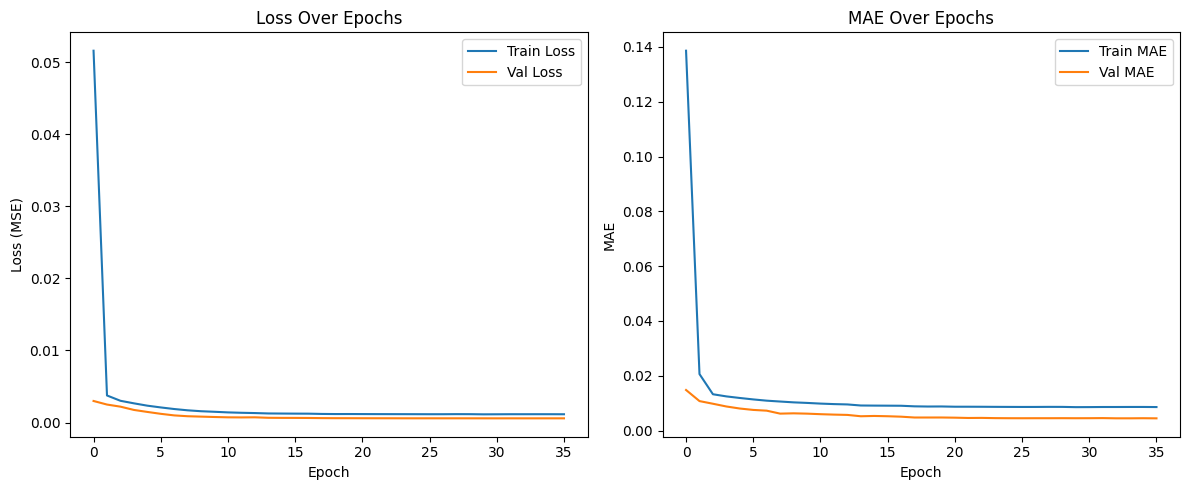

✅ Training plot saved as: ae_training_AdamW.png
📊 Evaluation for AdamW
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

🔧 Training AE with SGD
Epoch 1/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2485 - mae: 0.3679

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2481 - mae: 0.3676 - val_loss: 0.0081 - val_mae: 0.0417 - learning_rate: 0.0100
Epoch 2/100
614/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0528 - mae: 0.1765

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0527 - mae: 0.1762 - val_loss: 0.0059 - val_mae: 0.0264 - learning_rate: 0.0100
Epoch 3/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - mae: 0.1365

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0328 - mae: 0.1364 - val_loss: 0.0055 - val_mae: 0.0218 - learning_rate: 0.0100
Epoch 4/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mae: 0.1129

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0233 - mae: 0.1129 - val_loss: 0.0053 - val_mae: 0.0202 - learning_rate: 0.0100
Epoch 5/100
622/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mae: 0.0968

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0180 - mae: 0.0968 - val_loss: 0.0053 - val_mae: 0.0196 - learning_rate: 0.0100
Epoch 6/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mae: 0.0846

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0145 - mae: 0.0846 - val_loss: 0.0052 - val_mae: 0.0191 - learning_rate: 0.0100
Epoch 7/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mae: 0.0755

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0123 - mae: 0.0755 - val_loss: 0.0050 - val_mae: 0.0191 - learning_rate: 0.0100
Epoch 8/100
615/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mae: 0.0678

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0105 - mae: 0.0677 - val_loss: 0.0044 - val_mae: 0.0188 - learning_rate: 0.0100
Epoch 9/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mae: 0.0611

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0090 - mae: 0.0611 - val_loss: 0.0041 - val_mae: 0.0175 - learning_rate: 0.0100
Epoch 10/100
613/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mae: 0.0554

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0078 - mae: 0.0554 - val_loss: 0.0040 - val_mae: 0.0168 - learning_rate: 0.0100
Epoch 11/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mae: 0.0512

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0071 - mae: 0.0511 - val_loss: 0.0039 - val_mae: 0.0164 - learning_rate: 0.0100
Epoch 12/100
624/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mae: 0.0475

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0065 - mae: 0.0475 - val_loss: 0.0039 - val_mae: 0.0161 - learning_rate: 0.0100
Epoch 13/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mae: 0.0444

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0061 - mae: 0.0444 - val_loss: 0.0039 - val_mae: 0.0160 - learning_rate: 0.0100
Epoch 14/100
626/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mae: 0.0419


Epoch 14: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0058 - mae: 0.0419 - val_loss: 0.0038 - val_mae: 0.0157 - learning_rate: 0.0100
Epoch 15/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - mae: 0.0399

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0055 - mae: 0.0399 - val_loss: 0.0038 - val_mae: 0.0158 - learning_rate: 0.0050
Epoch 16/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mae: 0.0389

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0054 - mae: 0.0389 - val_loss: 0.0038 - val_mae: 0.0156 - learning_rate: 0.0050
Epoch 17/100
614/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mae: 0.0380

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0053 - mae: 0.0380 - val_loss: 0.0038 - val_mae: 0.0156 - learning_rate: 0.0050
Epoch 18/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mae: 0.0371


Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0052 - mae: 0.0371 - val_loss: 0.0038 - val_mae: 0.0156 - learning_rate: 0.0050
Epoch 19/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mae: 0.0365

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0051 - mae: 0.0365 - val_loss: 0.0038 - val_mae: 0.0156 - learning_rate: 0.0025
Epoch 20/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mae: 0.0361

627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0051 - mae: 0.0361 - val_loss: 0.0038 - val_mae: 0.0157 - learning_rate: 0.0025
Epoch 21/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mae: 0.0357


Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0050 - mae: 0.0357 - val_loss: 0.0038 - val_mae: 0.0155 - learning_rate: 0.0025
Epoch 22/100
618/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mae: 0.0355

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0050 - mae: 0.0355 - val_loss: 0.0038 - val_mae: 0.0156 - learning_rate: 0.0012
Epoch 23/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mae: 0.0354

627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0050 - mae: 0.0354 - val_loss: 0.0038 - val_mae: 0.0155 - learning_rate: 0.0012
Epoch 24/100
620/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mae: 0.0351


Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0050 - mae: 0.0351 - val_loss: 0.0038 - val_mae: 0.0156 - learning_rate: 0.0012
Epoch 25/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mae: 0.0349

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0049 - mae: 0.0349 - val_loss: 0.0038 - val_mae: 0.0156 - learning_rate: 6.2500e-04
Epoch 26/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0049 - mae: 0.0350 - val_loss: 0.0038 - val_mae: 0.0156 - learning_rate: 6.2500e-04
Epoch 27/100
623/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0348


Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0049 - mae: 0.0348 - val_loss: 0.0037 - val_mae: 0.0155 - learning_rate: 6.2500e-04
Epoch 28/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0049 - mae: 0.0348 - val_loss: 0.0037 - val_mae: 0.0155 - learning_rate: 3.1250e-04
Epoch 29/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0347

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0049 - mae: 0.0347 - val_loss: 0.0037 - val_mae: 0.0155 - learning_rate: 3.1250e-04
Epoch 30/100
625/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0347


Epoch 30: ReduceLROnPlateau reducing learning rate to 0.00015624999650754035.
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0049 - mae: 0.0347 - val_loss: 0.0037 - val_mae: 0.0157 - learning_rate: 3.1250e-04
Epoch 31/100
613/627 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mae: 0.0346

627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0049 - mae: 0.0346 - val_loss: 0.0037 - val_mae: 0.0156 - learning_rate: 1.5625e-04
Epoch 32/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0049 - mae: 0.0346 - val_loss: 0.0037 - val_mae: 0.0157 - learning_rate: 1.5625e-04
Epoch 33/100
616/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0346


Epoch 33: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0049 - mae: 0.0346 - val_loss: 0.0037 - val_mae: 0.0155 - learning_rate: 1.5625e-04
Epoch 34/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0049 - mae: 0.0346 - val_loss: 0.0037 - val_mae: 0.0156 - learning_rate: 7.8125e-05
Epoch 35/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0049 - mae: 0.0346 - val_loss: 0.0037 - val_mae: 0.0157 - learning_rate: 7.8125e-05
Epoch 36/100
614/627 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0346
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.9062499126885086e-05.
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0049 - mae: 0.0346 - val_loss: 0.0037 - val_mae: 0.0156 - learning_rate: 7.8125e-05
Epoch 37/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0049 - mae: 0.0347 - val_loss: 0.0037 - val_mae: 0.0156 - learning_rate: 3.9062e-05
Epoch 38/100
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6m

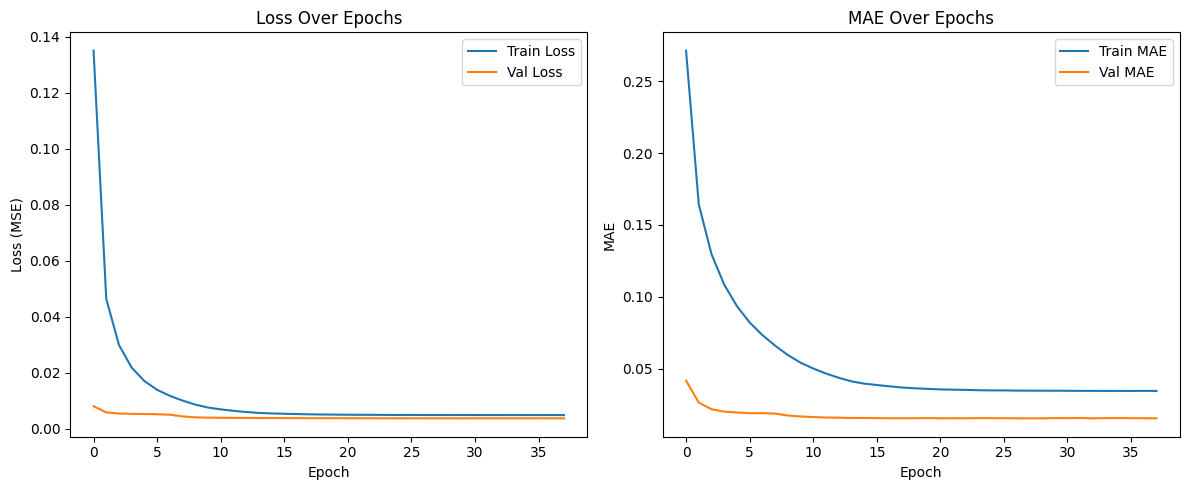

✅ Training plot saved as: ae_training_SGD.png
📊 Evaluation for SGD
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ Results saved to optimizer_comparison_results.csv


In [17]:
# Train & Evaluate
for name, opt in optimizers.items():
    print(f"\n🔧 Training AE with {name}")
    model = build_ae(input_dim=X_train.shape[1], encoding_dim=16, activation='tanh')
    hist, trained_model = train_autoencoder_with_optimizer(
        model, X_train, X_val,
        optimizer=opt,
        save_path=f'best_ae_{name}.h5'
    )

    # Save loss curve
    plot_training_history(hist, save_path=f'ae_training_{name}.png')

    # Evaluate on full test set
    print(f"📊 Evaluation for {name}")
    re = compute_reconstruction_error(trained_model, X_test)
    result = evaluate_anomaly_detection(re, y_test)
    results[name] = result

# Save results
df_results = pd.DataFrame(results).T
df_results.to_csv("optimizer_comparison_results.csv")
print("✅ Results saved to optimizer_comparison_results.csv")